<a href="https://colab.research.google.com/github/sdikici/Time_Series_Experiments/blob/main/Prophet_Experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! mkdir ~/.kaggle

In [2]:
! cp kaggle.json ~/.kaggle/

In [3]:
! chmod 600 ~/.kaggle/kaggle.json

In [4]:
! kaggle datasets download -d albertovidalrod/electricity-consumption-uk-20092022
! unzip electricity-consumption-uk-20092022.zip

 78% 15.0M/19.2M [00:00<00:00, 24.2MB/s]
100% 19.2M/19.2M [00:01<00:00, 18.5MB/s]
Archive:  electricity-consumption-uk-20092022.zip
  inflating: historic_demand_2009_2024.csv  
  inflating: historic_demand_2009_2024_noNaN.csv  
  inflating: historic_demand_year_2009.csv  
  inflating: historic_demand_year_2010.csv  
  inflating: historic_demand_year_2011.csv  
  inflating: historic_demand_year_2012.csv  
  inflating: historic_demand_year_2013.csv  
  inflating: historic_demand_year_2014.csv  
  inflating: historic_demand_year_2015.csv  
  inflating: historic_demand_year_2016.csv  
  inflating: historic_demand_year_2017.csv  
  inflating: historic_demand_year_2018.csv  
  inflating: historic_demand_year_2019.csv  
  inflating: historic_demand_year_2020.csv  
  inflating: historic_demand_year_2021.csv  
  inflating: historic_demand_year_2022.csv  
  inflating: historic_demand_year_2023.csv  
  inflating: historic_demand_year_2024.csv  


In [5]:
!kaggle datasets download -d sercandikici/london-weather-database-from-2009-to-2024
! unzip london-weather-database-from-2009-to-2024.zip

100% 301k/301k [00:00<00:00, 865kB/s]
100% 301k/301k [00:00<00:00, 864kB/s]
Archive:  london-weather-database-from-2009-to-2024.zip
  inflating: London_2009_to_2024_forecast.csv  


In [6]:
from prophet import Prophet
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [7]:
df_raw = pd.read_csv("historic_demand_2009_2024_noNaN.csv")
df_raw

,settlement_date,settlement_period,period_hour,nd,tsd,england_wales_demand,embedded_wind_generation,embedded_wind_capacity,embedded_solar_generation,embedded_solar_capacity,non_bm_stor,pump_storage_pumping,ifa_flow,ifa2_flow,britned_flow,moyle_flow,east_west_flow,nemo_flow,is_holiday
0,2009-01-01 00:00:00,1,0:00:00,37910,38704,33939,54,1403,0,0,0,33,2002,0,0,-161,0,0,1
1,2009-01-01 00:30:00,2,0:30:00,38047,38964,34072,53,1403,0,0,0,157,2002,0,0,-160,0,0,1
2,2009-01-01 01:00:00,3,1:00:00,37380,38651,33615,53,1403,0,0,0,511,2002,0,0,-160,0,0,1
3,2009-01-01 01:30:00,4,1:30:00,36426,37775,32526,50,1403,0,0,0,589,1772,0,0,-160,0,0,1
4,2009-01-01 02:00:00,5,2:00:00,35687,37298,31877,50,1403,0,0,0,851,1753,0,0,-160,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263725,2024-02-01 21:30:00,44,21:30:00,30390,31489,28527,3207,6562,0,15905,0,11,335,-4,436,-178,-57,-146,0
263726,2024-02-01 22:00:00,45,22:00:00,28382,29435,26713,3287,6562,0,15905,0,12,189,-4,114,-35,11,-254,0
263727,2024-02-01 22:30:00,46,22:30:00,26693,27763,25119,3366,6562,0,15905,0,12,175,-4,105,-49,0,-254,0
263728,2024-02-01 23:00:00,47,23:00:00,24773,25657,23356,3408,6562,0,15905,0,17,-101,-4,285,-22,0,210,0


In [8]:
df3_year = df_raw[["settlement_date","tsd"]]
df3_year = df3_year[(df3_year["settlement_date"] >= "2009-01-01 00:00:00")&(df3_year["settlement_date"] <= "2011-12-31 23:30:00")]
df3_year

,settlement_date,tsd
0,2009-01-01 00:00:00,38704
1,2009-01-01 00:30:00,38964
2,2009-01-01 01:00:00,38651
3,2009-01-01 01:30:00,37775
4,2009-01-01 02:00:00,37298
...,...,...
52261,2011-12-31 21:30:00,31982
52262,2011-12-31 22:00:00,31145
52263,2011-12-31 22:30:00,30803
52264,2011-12-31 23:00:00,30441


get daily mean data

In [9]:
df3_year['settlement_date'] = pd.to_datetime(df3_year['settlement_date'])
df3_year['settlement_date'] = df3_year['settlement_date'].dt.floor('D')
df3_year

,settlement_date,tsd
0,2009-01-01,38704
1,2009-01-01,38964
2,2009-01-01,38651
3,2009-01-01,37775
4,2009-01-01,37298
...,...,...
52261,2011-12-31,31982
52262,2011-12-31,31145
52263,2011-12-31,30803
52264,2011-12-31,30441


In [10]:
daily = df3_year.groupby('settlement_date').agg({'tsd': 'mean'}).reset_index()
daily

,settlement_date,tsd
0,2009-01-01,38528.395833
1,2009-01-02,41133.458333
2,2009-01-03,40667.791667
3,2009-01-04,41013.958333
4,2009-01-05,47322.312500
...,...,...
1084,2011-12-27,33447.875000
1085,2011-12-28,35252.062500
1086,2011-12-29,36492.541667
1087,2011-12-30,37148.395833


In [11]:
daily["settlement_date"] = pd.to_datetime(daily["settlement_date"])
daily.set_index("settlement_date", inplace=True)
daily

,tsd
settlement_date,
2009-01-01,38528.395833
2009-01-02,41133.458333
2009-01-03,40667.791667
2009-01-04,41013.958333
2009-01-05,47322.312500
...,...
2011-12-27,33447.875000
2011-12-28,35252.062500
2011-12-29,36492.541667


In [12]:
df = daily.copy()
df["Date"] = df.index
df.columns=["y","ds"]
df

,y,ds
settlement_date,,
2009-01-01,38528.395833,2009-01-01
2009-01-02,41133.458333,2009-01-02
2009-01-03,40667.791667,2009-01-03
2009-01-04,41013.958333,2009-01-04
2009-01-05,47322.312500,2009-01-05
...,...,...
2011-12-27,33447.875000,2011-12-27
2011-12-28,35252.062500,2011-12-28
2011-12-29,36492.541667,2011-12-29


In [13]:
m = Prophet()
m.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5gwlxgai/5dl4gjur.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5gwlxgai/holg8uy7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7606', 'data', 'file=/tmp/tmp5gwlxgai/5dl4gjur.json', 'init=/tmp/tmp5gwlxgai/holg8uy7.json', 'output', 'file=/tmp/tmp5gwlxgai/prophet_modelknb2sty_/prophet_model-20240227105007.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:50:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:50:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [14]:
periods = 30
future = m.make_future_dataframe(periods=periods)
future.tail()

,ds
1114,2012-01-26
1115,2012-01-27
1116,2012-01-28
1117,2012-01-29
1118,2012-01-30


In [15]:
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1114,2012-01-26,33893.889588,40643.187819,44573.434472,33849.130727,33947.316527,8692.591220,8692.591220,8692.591220,1746.636410,1746.636410,1746.636410,6945.954809,6945.954809,6945.954809,0.0,0.0,0.0,42586.480808
1115,2012-01-27,33879.255657,39470.913551,43606.766388,33829.656381,33939.877803,7694.996612,7694.996612,7694.996612,824.570820,824.570820,824.570820,6870.425792,6870.425792,6870.425792,0.0,0.0,0.0,41574.252269
1116,2012-01-28,33864.621726,35581.507537,39278.104870,33811.918569,33928.977780,3532.688435,3532.688435,3532.688435,-3246.721882,-3246.721882,-3246.721882,6779.410317,6779.410317,6779.410317,0.0,0.0,0.0,37397.310160
1117,2012-01-29,33849.987794,34393.995296,38300.757112,33789.828233,33917.757573,2539.718771,2539.718771,2539.718771,-4135.588004,-4135.588004,-4135.588004,6675.306776,6675.306776,6675.306776,0.0,0.0,0.0,36389.706566
1118,2012-01-30,33835.353863,39403.495783,43279.412721,33773.138517,33911.219401,7512.013287,7512.013287,7512.013287,951.367268,951.367268,951.367268,6560.646018,6560.646018,6560.646018,0.0,0.0,0.0,41347.367150


In [ ]:
m.plot(forecast)

In [ ]:
m.plot_components(forecast)


Performance and cross validation

In [18]:
from prophet.diagnostics import cross_validation

In [25]:
df_cv = cross_validation(m,
                         initial="720 days",#initial training points
                         period="30 days", #step size
                         horizon="60 days")# numnber of steps to forecast

INFO:prophet:Making 11 forecasts with cutoffs between 2011-01-05 00:00:00 and 2011-11-01 00:00:00


  0%|          | 0/11 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5gwlxgai/ogbl3yoe.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5gwlxgai/7udx05w9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99784', 'data', 'file=/tmp/tmp5gwlxgai/ogbl3yoe.json', 'init=/tmp/tmp5gwlxgai/7udx05w9.json', 'output', 'file=/tmp/tmp5gwlxgai/prophet_modelsuojhcq0/prophet_model-20240227105314.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:53:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:53:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5gwlxgai/wyrztj24.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5gwlxgai/498e_dw1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

In [26]:
from prophet.diagnostics import performance_metrics

pm = performance_metrics(df_cv)
pm

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,6 days,2.035493e+06,1426.706934,1091.490549,0.029612,0.020719,0.029466,0.787879
1,7 days,2.181927e+06,1477.134860,1135.826512,0.030583,0.025353,0.030438,0.757576
2,8 days,2.669105e+06,1633.739613,1239.399723,0.033040,0.028714,0.032854,0.757576
3,9 days,3.201377e+06,1789.239199,1351.901051,0.035914,0.029680,0.035665,0.742424
4,10 days,3.758070e+06,1938.574325,1476.372573,0.039467,0.034975,0.039165,0.727273
5,11 days,4.414675e+06,2101.112819,1592.767550,0.042906,0.037655,0.042475,0.727273
6,12 days,4.648045e+06,2155.932596,1645.705393,0.044396,0.038636,0.043882,0.757576
7,13 days,4.783231e+06,2187.059961,1655.904997,0.044567,0.039138,0.044033,0.772727
8,14 days,4.376268e+06,2091.953067,1560.831322,0.041965,0.037893,0.041514,0.787879
9,15 days,3.842311e+06,1960.181256,1467.630797,0.039529,0.037386,0.039266,0.803030


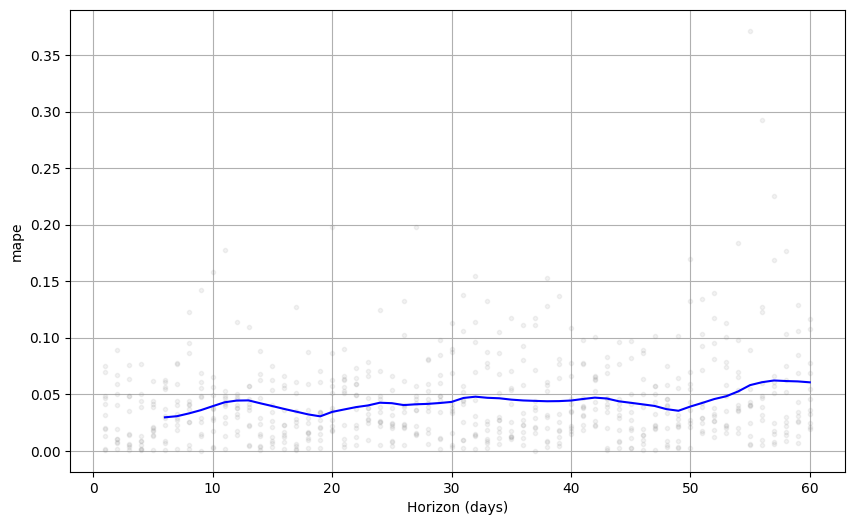

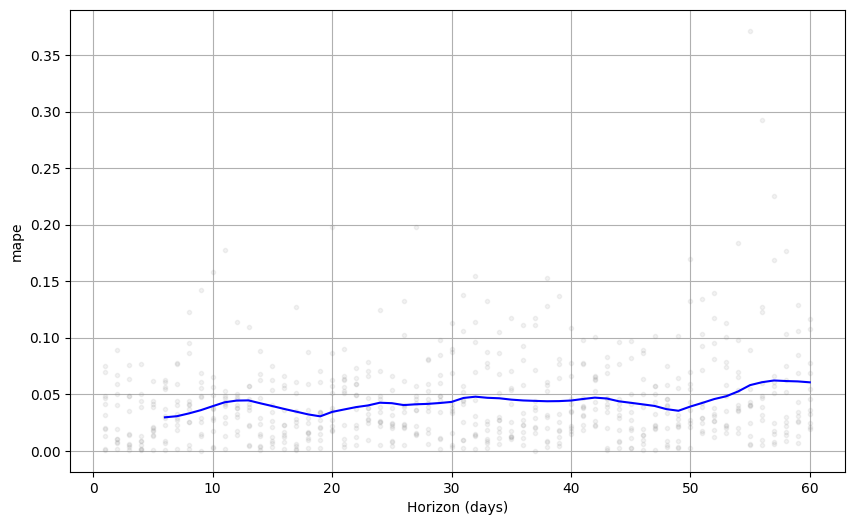

In [27]:
from prophet.plot import plot_cross_validation_metric
plot_cross_validation_metric(df_cv,metric="mape")

Add holidays

In [28]:
m2 = Prophet()
m2.add_country_holidays(country_name="UK")
m2.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5gwlxgai/a7uo1x5g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5gwlxgai/rs8wv74m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44526', 'data', 'file=/tmp/tmp5gwlxgai/a7uo1x5g.json', 'init=/tmp/tmp5gwlxgai/rs8wv74m.json', 'output', 'file=/tmp/tmp5gwlxgai/prophet_modelmw24mi4b/prophet_model-20240227105332.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:53:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:53:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


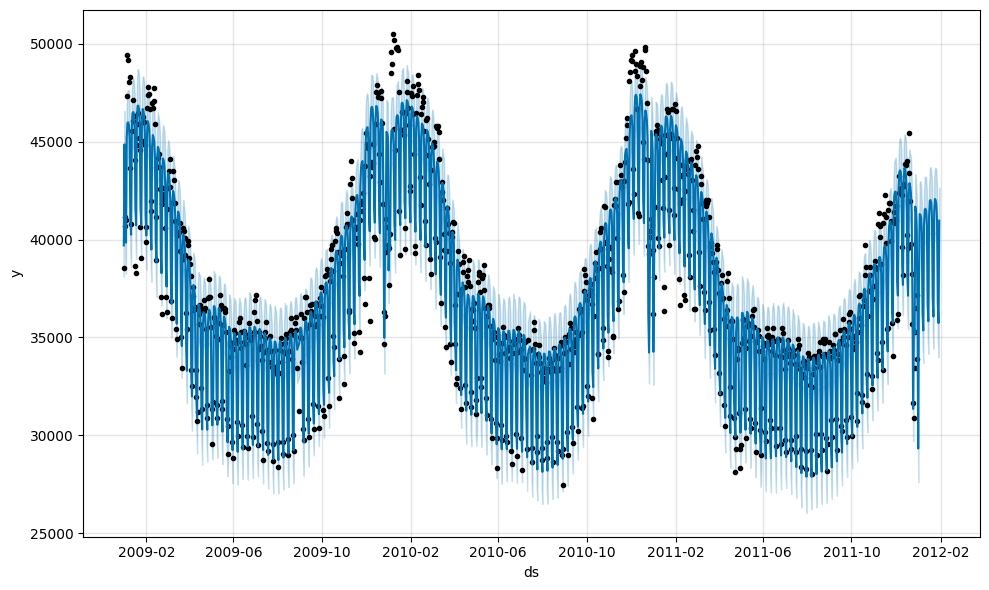

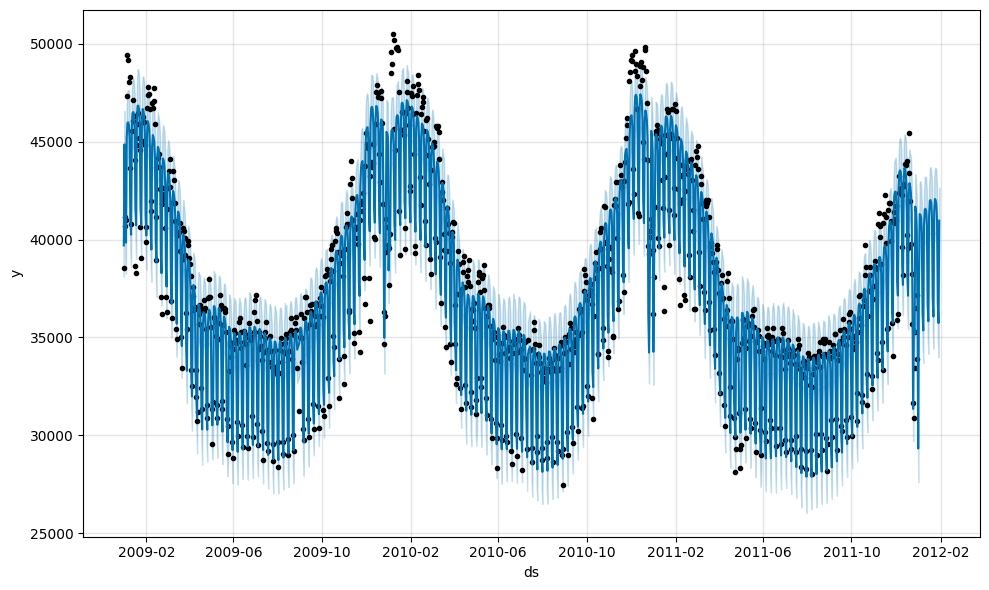

In [29]:
future2 = m2.make_future_dataframe(periods=periods)
forecast2 = m2.predict(future2)
m2.plot(forecast2)

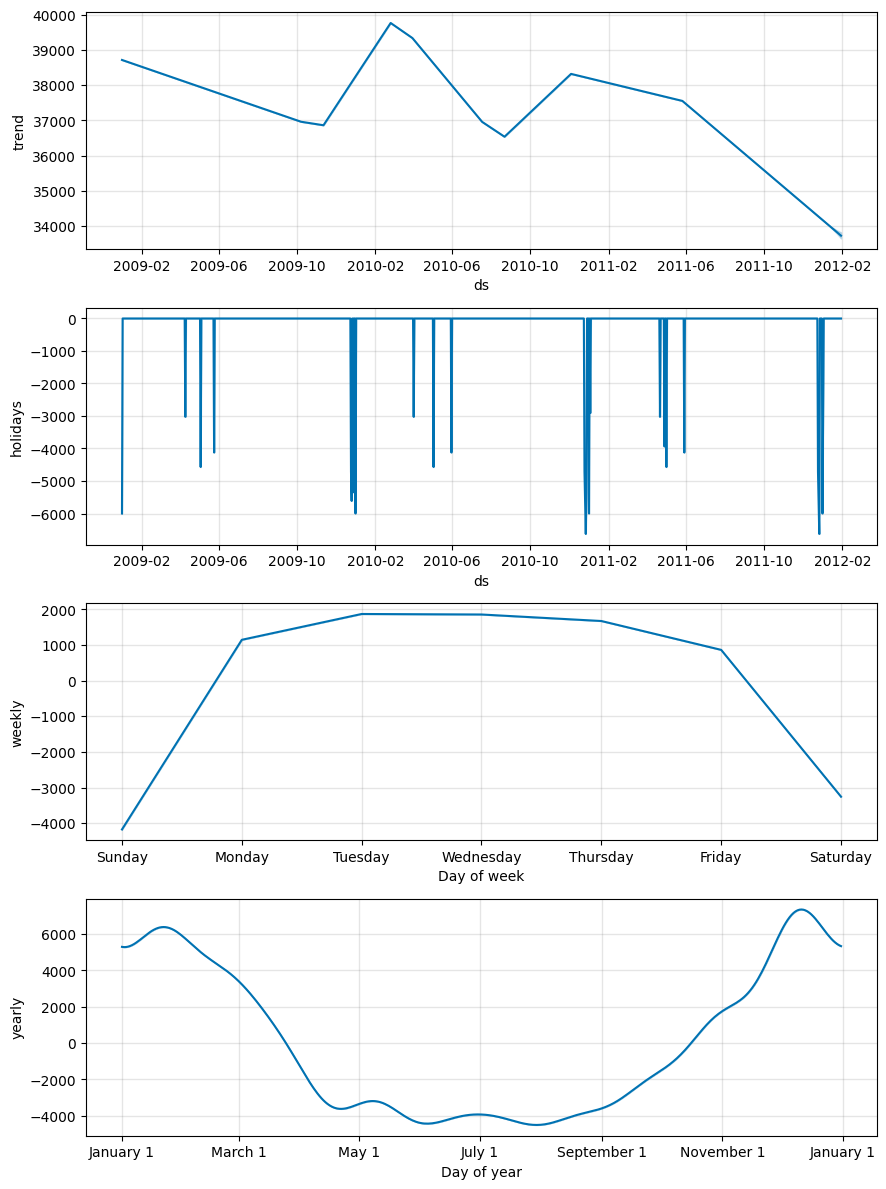

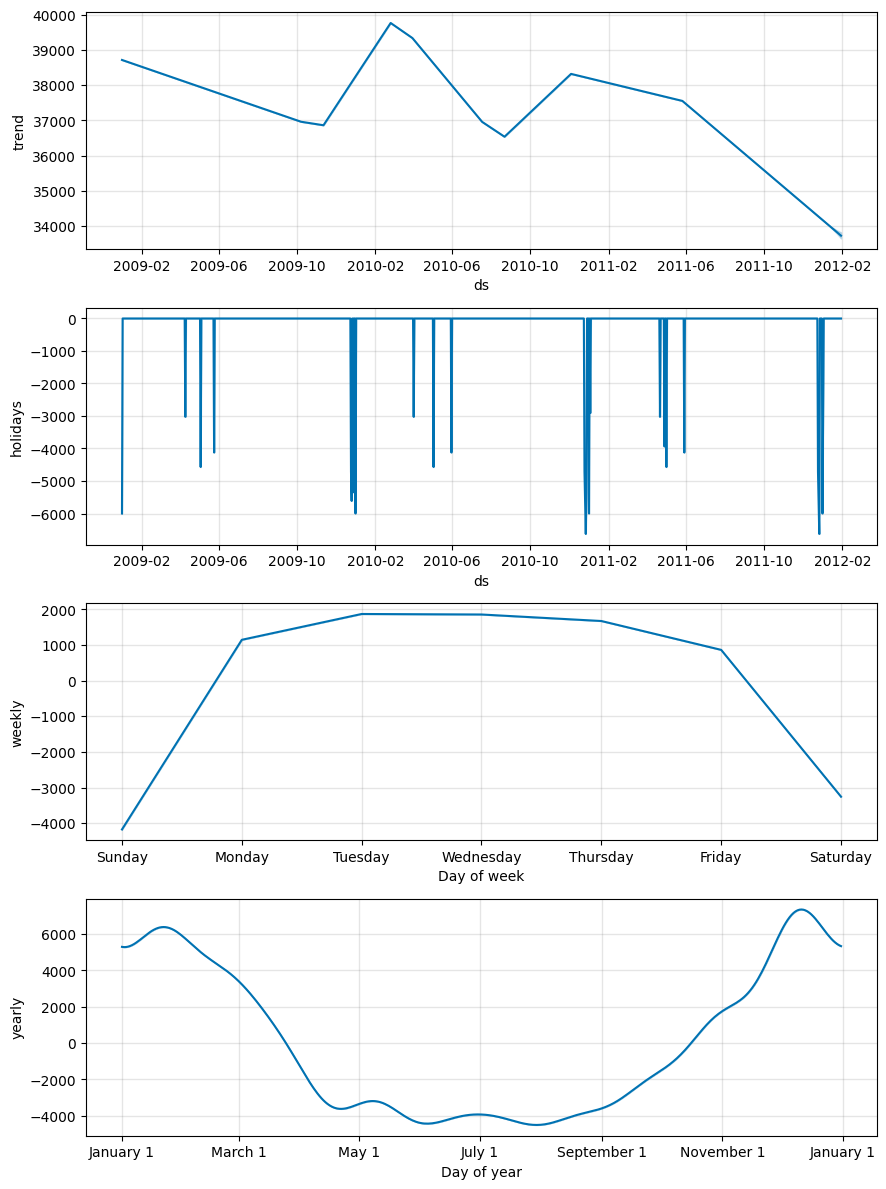

In [30]:
m2.plot_components(forecast2)

In [31]:
df_cv2 = cross_validation(m2,
                         initial="720 days",#initial training points
                         period="30 days", #step size
                         horizon="60 days")# numnber of steps to forecast

INFO:prophet:Making 11 forecasts with cutoffs between 2011-01-05 00:00:00 and 2011-11-01 00:00:00


  0%|          | 0/11 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5gwlxgai/1zn1djbn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5gwlxgai/cjw11_7m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42432', 'data', 'file=/tmp/tmp5gwlxgai/1zn1djbn.json', 'init=/tmp/tmp5gwlxgai/cjw11_7m.json', 'output', 'file=/tmp/tmp5gwlxgai/prophet_models3au8os4/prophet_model-20240227105349.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:53:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:53:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5gwlxgai/b5ui1qhy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5gwlxgai/l9frfeae.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

In [32]:
pm2 = performance_metrics(df_cv2)
pm2

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,6 days,2.353633e+06,1534.155563,1134.219063,0.030115,0.022108,0.029740,0.727273
1,7 days,2.516937e+06,1586.485867,1167.239384,0.030803,0.024178,0.030426,0.727273
2,8 days,3.102278e+06,1761.328414,1261.795404,0.033090,0.025718,0.032646,0.712121
3,9 days,3.615800e+06,1901.525714,1356.121114,0.035508,0.029076,0.034994,0.696970
4,10 days,4.204256e+06,2050.428173,1475.259894,0.038917,0.030827,0.038315,0.696970
5,11 days,4.804997e+06,2192.030385,1559.951843,0.041567,0.031787,0.040822,0.696970
6,12 days,5.045682e+06,2246.259662,1595.303969,0.042590,0.031787,0.041762,0.712121
7,13 days,5.105363e+06,2259.505092,1587.698574,0.042353,0.032430,0.041509,0.742424
8,14 days,4.580111e+06,2140.119400,1473.494867,0.039224,0.030756,0.038493,0.772727
9,15 days,3.922529e+06,1980.537574,1370.158909,0.036527,0.029802,0.036006,0.787879


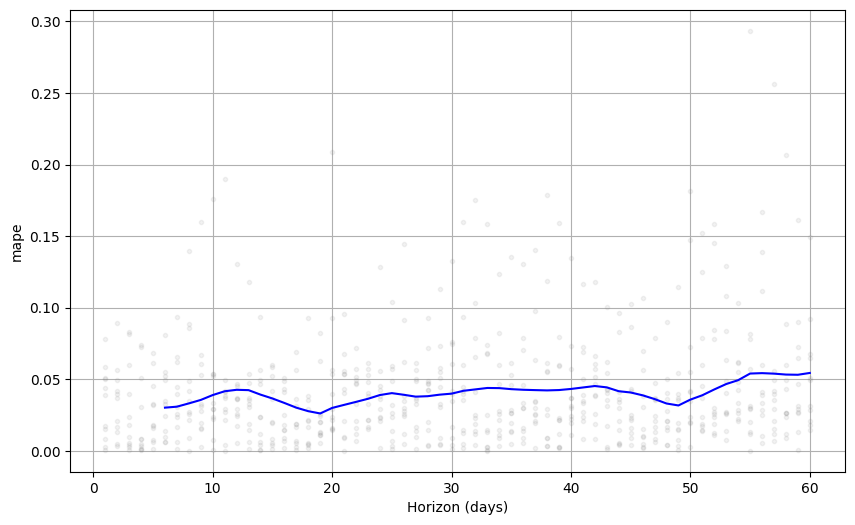

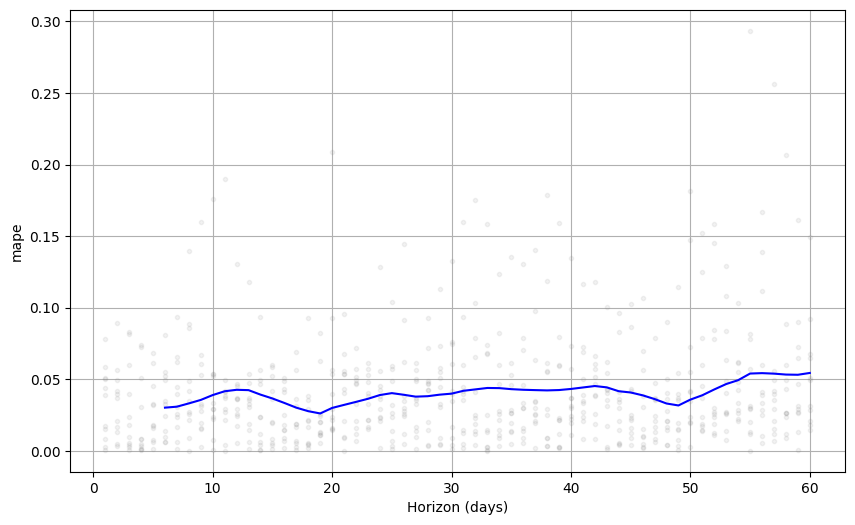

In [33]:
from prophet.plot import plot_cross_validation_metric
plot_cross_validation_metric(df_cv2,metric="mape")

we are going to add regressor - weather

In [62]:
df

,y,ds
settlement_date,,
2009-01-01,38528.395833,2009-01-01
2009-01-02,41133.458333,2009-01-02
2009-01-03,40667.791667,2009-01-03
2009-01-04,41013.958333,2009-01-04
2009-01-05,47322.312500,2009-01-05
...,...,...
2011-12-27,33447.875000,2011-12-27
2011-12-28,35252.062500,2011-12-28
2011-12-29,36492.541667,2011-12-29


In [ ]:
df_weather = pd.read_csv("London_2009_to_2024_forecast.csv")
df_weather

In [64]:
weather3_year = df_weather[["datetime","temp"]]
weather3_year = weather3_year[(weather3_year["datetime"] >= "2009-01-01")&(weather3_year["datetime"] <= "2011-12-31")]
weather3_year["datetime"] = pd.to_datetime(weather3_year["datetime"])
weather3_year

,datetime,temp
0,2009-01-01,1.2
1,2009-01-02,2.1
2,2009-01-03,-1.7
3,2009-01-04,-2.6
4,2009-01-05,0.0
...,...,...
1090,2011-12-27,10.1
1091,2011-12-28,9.1
1092,2011-12-29,7.5
1093,2011-12-30,6.8


In [67]:
merged_df=pd.merge(df,weather3_year,left_on=df["ds"].dt.date,right_on=weather3_year["datetime"].dt.date,how="inner")
merged_df = merged_df.drop(columns=['datetime'])
merged_df

,key_0,y,ds,temp
0,2009-01-01,38528.395833,2009-01-01,1.2
1,2009-01-02,41133.458333,2009-01-02,2.1
2,2009-01-03,40667.791667,2009-01-03,-1.7
3,2009-01-04,41013.958333,2009-01-04,-2.6
4,2009-01-05,47322.312500,2009-01-05,0.0
...,...,...,...,...
1084,2011-12-27,33447.875000,2011-12-27,10.1
1085,2011-12-28,35252.062500,2011-12-28,9.1
1086,2011-12-29,36492.541667,2011-12-29,7.5
1087,2011-12-30,37148.395833,2011-12-30,6.8


In [68]:
merged_df["ds"] = pd.to_datetime(merged_df["ds"])
merged_df.set_index("key_0", inplace=True)
merged_df.sort_index(inplace=True)
merged_df

,y,ds,temp
key_0,,,
2009-01-01,38528.395833,2009-01-01,1.2
2009-01-02,41133.458333,2009-01-02,2.1
2009-01-03,40667.791667,2009-01-03,-1.7
2009-01-04,41013.958333,2009-01-04,-2.6
2009-01-05,47322.312500,2009-01-05,0.0
...,...,...,...
2011-12-27,33447.875000,2011-12-27,10.1
2011-12-28,35252.062500,2011-12-28,9.1
2011-12-29,36492.541667,2011-12-29,7.5


In [69]:
df2 = merged_df.copy()
df2

,y,ds,temp
key_0,,,
2009-01-01,38528.395833,2009-01-01,1.2
2009-01-02,41133.458333,2009-01-02,2.1
2009-01-03,40667.791667,2009-01-03,-1.7
2009-01-04,41013.958333,2009-01-04,-2.6
2009-01-05,47322.312500,2009-01-05,0.0
...,...,...,...
2011-12-27,33447.875000,2011-12-27,10.1
2011-12-28,35252.062500,2011-12-28,9.1
2011-12-29,36492.541667,2011-12-29,7.5


In [70]:
m3= Prophet()
m3.add_regressor("temp", mode="multiplicative")
m3.fit(df2)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5gwlxgai/vx451p33.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5gwlxgai/na4t_78m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66464', 'data', 'file=/tmp/tmp5gwlxgai/vx451p33.json', 'init=/tmp/tmp5gwlxgai/na4t_78m.json', 'output', 'file=/tmp/tmp5gwlxgai/prophet_modelk7tro6n8/prophet_model-20240227111254.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:12:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:12:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [71]:
future3 = m3.make_future_dataframe(periods=periods)

create train and text idx which will be used to index future dataframe

In [72]:
train_idx = future3["ds"].isin(df2.index)
test_idx = ~train_idx

add regressors to future dataframe

In [73]:
reg = ["temp"]
for r in reg:
  future3.loc[train_idx, r] = df2[r].to_list()

for r in reg:
  future3.loc[test_idx, r] = df2.iloc[-30:][r].to_list()


In [ ]:
future3

In [75]:
forecast3 = m3.predict(future3)

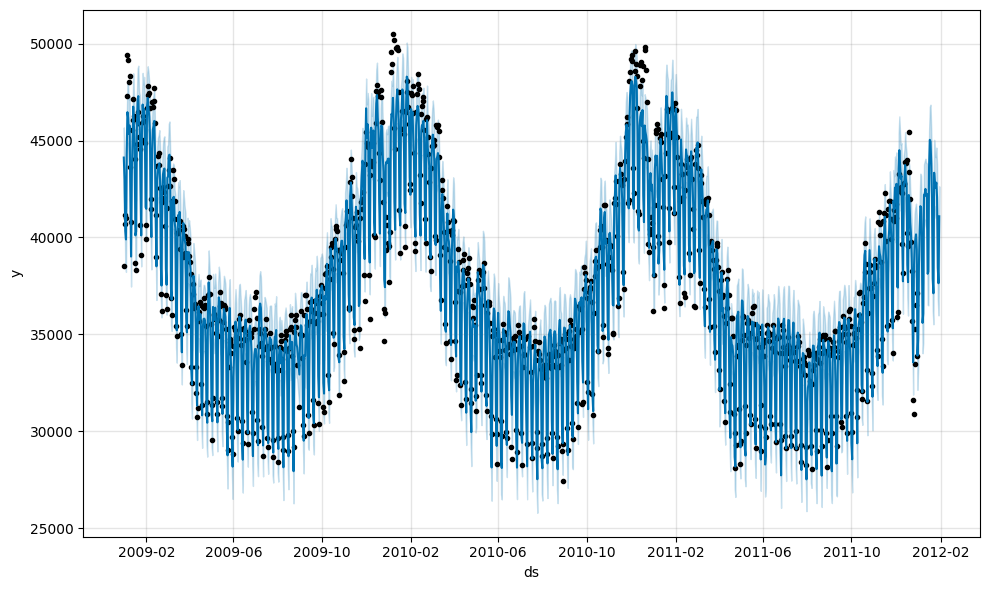

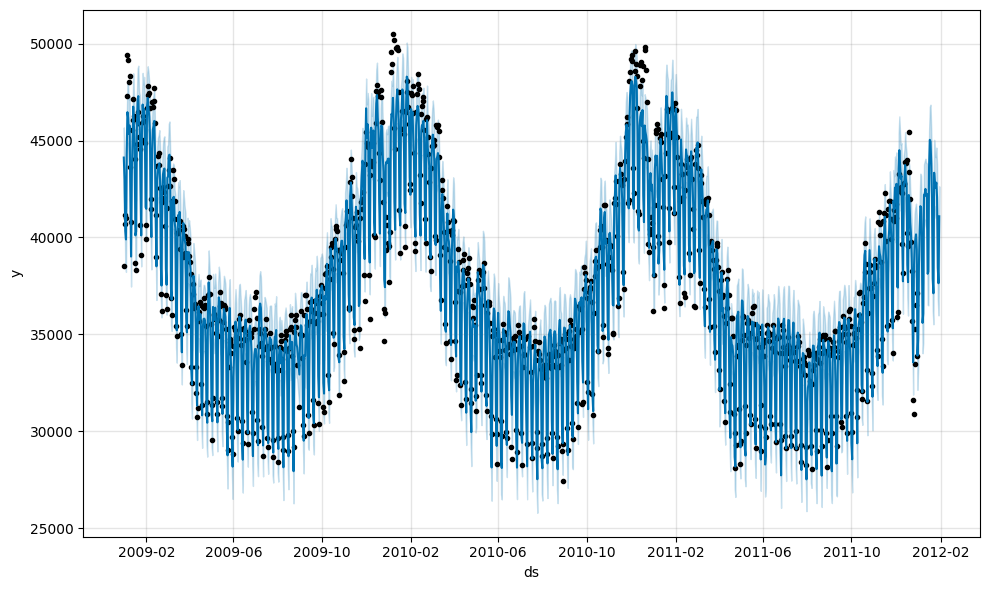

In [76]:
m3.plot(forecast3)

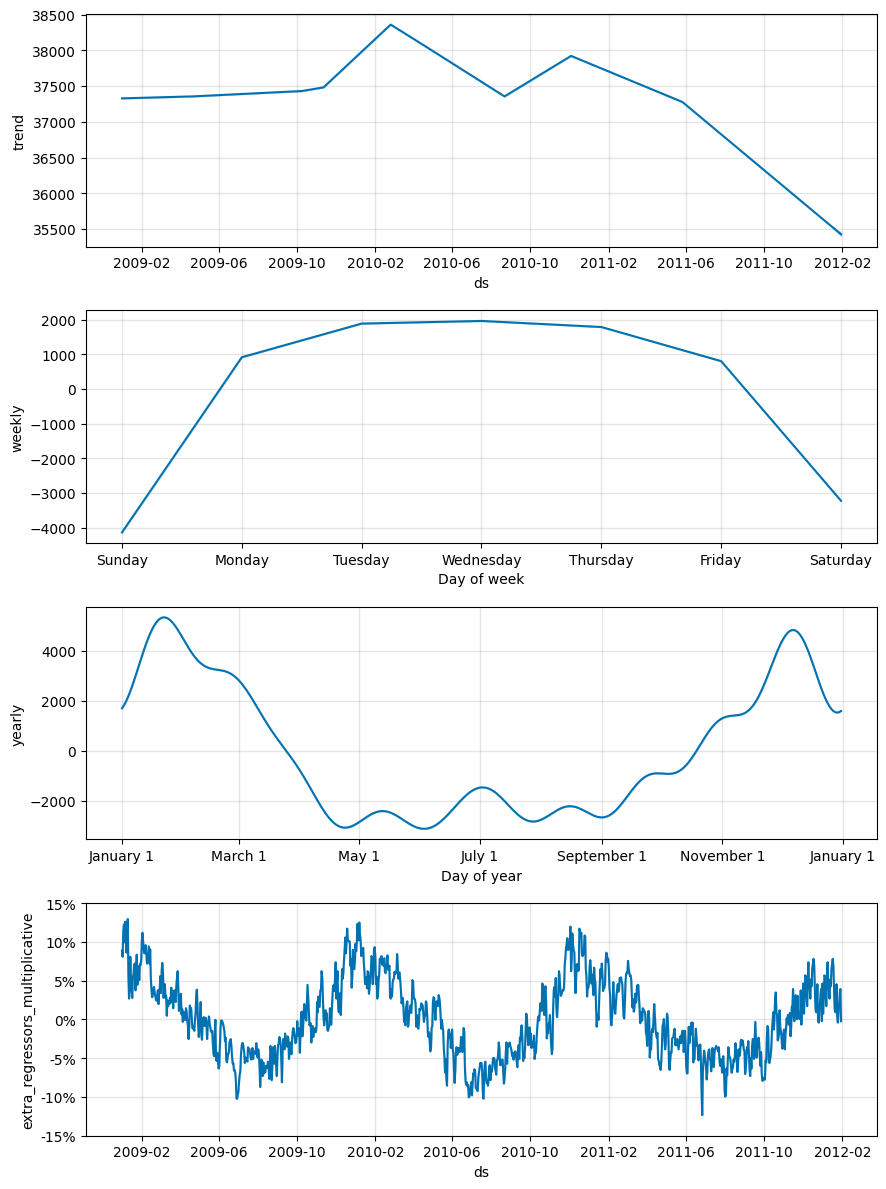

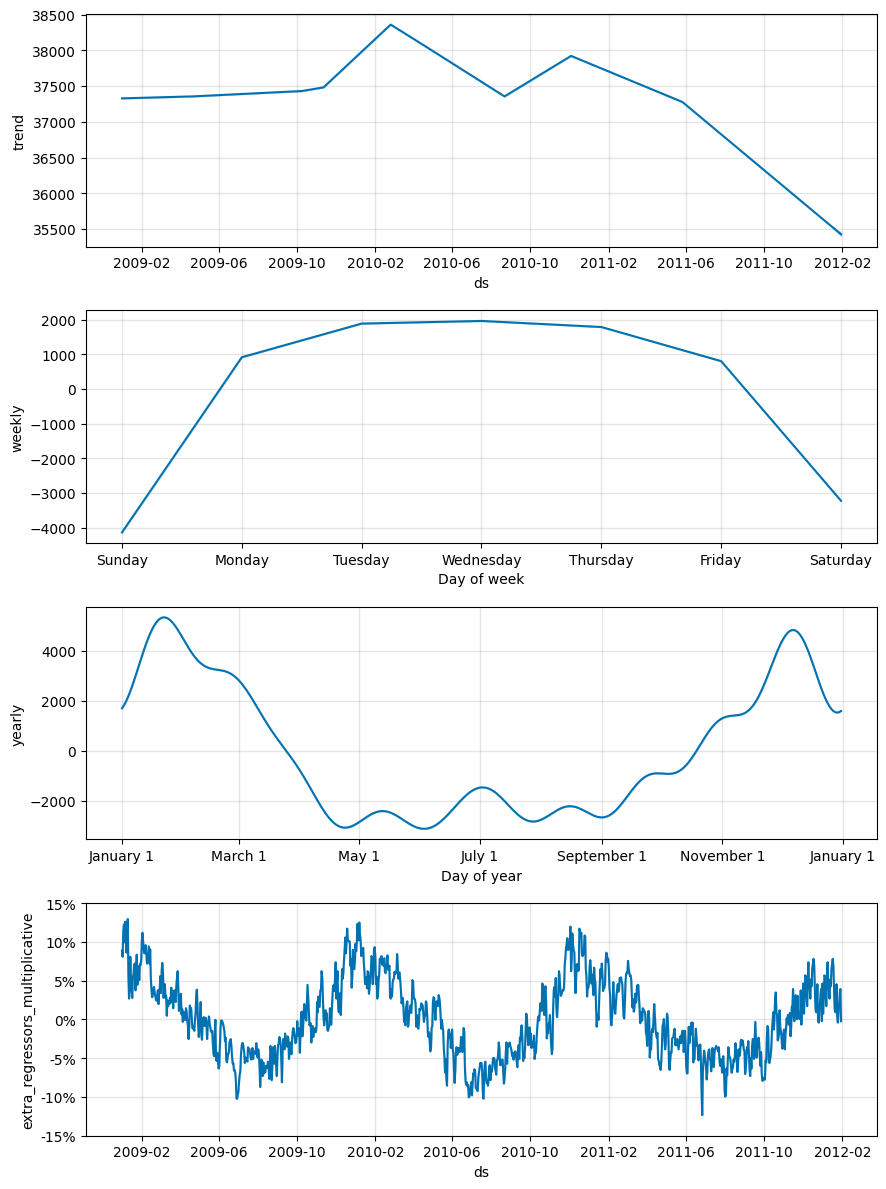

In [77]:
m3.plot_components(forecast3)

In [79]:
df_cv3 = cross_validation(m3,
                          initial="720 days",
                          period = "30 days",
                          horizon="60 days")

pm3 = performance_metrics(df_cv3)

INFO:prophet:Making 11 forecasts with cutoffs between 2011-01-05 00:00:00 and 2011-11-01 00:00:00


  0%|          | 0/11 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5gwlxgai/onl6tpt5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5gwlxgai/xyb3ew5t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68078', 'data', 'file=/tmp/tmp5gwlxgai/onl6tpt5.json', 'init=/tmp/tmp5gwlxgai/xyb3ew5t.json', 'output', 'file=/tmp/tmp5gwlxgai/prophet_modelr7o48nzq/prophet_model-20240227111350.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:13:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:13:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5gwlxgai/ltqc0qwa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5gwlxgai/ulfjftfe.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

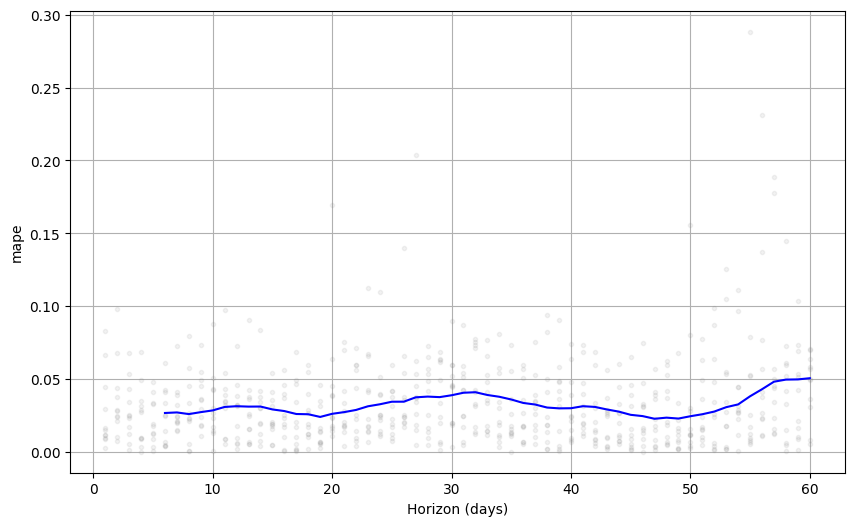

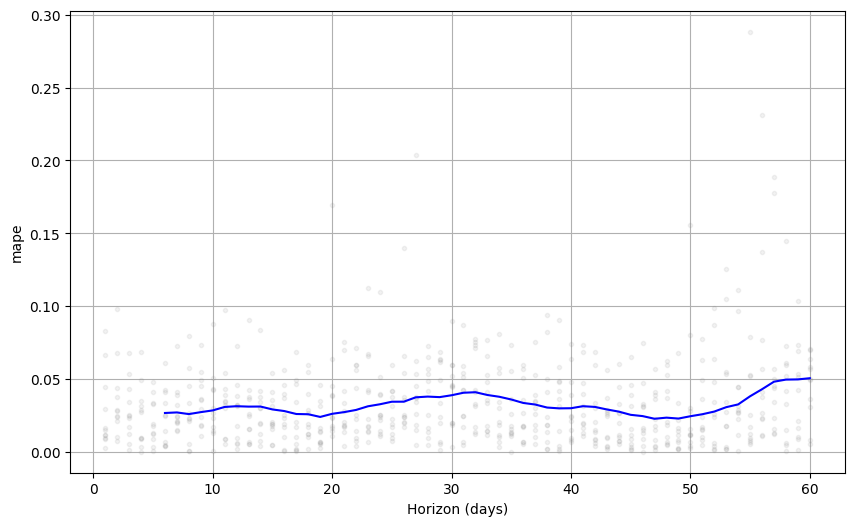

In [80]:
plot_cross_validation_metric(df_cv3,metric="mape")

In [81]:
print("MAPE without regressor: "+ str(round(pm["mape"].mean(),4))), # the first model where we had no holiday
print("MAPE with regressor holiday: "+ str(round(pm2["mape"].mean(),4))),# the model where we added UK holidays as regressor
print("MAPE with regressor holiday and weather: "+ str(round(pm3["mape"].mean(),4))) # the last model where we add extra regressor weather

MAPE without regressor: 0.0433
MAPE with regressor holiday: 0.0402
MAPE with regressor holiday and weather: 0.0322


trial with regressor additive

In [82]:
m4= Prophet()
m4.add_regressor("temp", mode="additive")
m4.fit(df2)

future4 = m4.make_future_dataframe(periods=periods)
train_idx = future4['ds'].isin(df2.index)
test_idx = ~train_idx

reg = ["temp"]
for r in reg:
  future4.loc[train_idx, r] = df2[r].to_list()

for r in reg:
  future4.loc[test_idx, r] = df2.iloc[-30:][r].to_list()

forecast4 = m4.predict(future4)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5gwlxgai/of_920qs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5gwlxgai/48fvvsny.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13116', 'data', 'file=/tmp/tmp5gwlxgai/of_920qs.json', 'init=/tmp/tmp5gwlxgai/48fvvsny.json', 'output', 'file=/tmp/tmp5gwlxgai/prophet_modelsxyqvgdk/prophet_model-20240227111418.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:14:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:14:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [84]:
df_cv4 = cross_validation(m4,
                          initial="720 days",
                          period = "30 days",
                          horizon="60 days")

pm4 = performance_metrics(df_cv4)

INFO:prophet:Making 11 forecasts with cutoffs between 2011-01-05 00:00:00 and 2011-11-01 00:00:00


  0%|          | 0/11 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5gwlxgai/e71k2yn6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5gwlxgai/767mk41v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44815', 'data', 'file=/tmp/tmp5gwlxgai/e71k2yn6.json', 'init=/tmp/tmp5gwlxgai/767mk41v.json', 'output', 'file=/tmp/tmp5gwlxgai/prophet_modelv_sun_j2/prophet_model-20240227111430.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:14:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:14:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5gwlxgai/4o9ze6s6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5gwlxgai/rtqs8bkn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

In [85]:
print("MAPE without regressor: "+ str(round(pm["mape"].mean(),4))), # the first model where we had no holiday
print("MAPE with regressor holiday: "+ str(round(pm2["mape"].mean(),4))),# the model where we added UK holidays as regressor
print("MAPE with regressor holiday and weather: "+ str(round(pm3["mape"].mean(),4))) # the last model where we add extra regressor weather
print("additive MAPE with regressor holiday and weather: "+ str(round(pm4["mape"].mean(),4))) # the last model where we add extra regressor weather

MAPE without regressor: 0.0433
MAPE with regressor holiday: 0.0402
MAPE with regressor holiday and weather: 0.0322
additive MAPE with regressor holiday and weather: 0.0328
